# Obtaining the Data

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


In [2]:
def fetch_california_data() -> pd.DataFrame:
    """_summary_

    Returns:
        pd.DataFrame: _description_
    """
    data = fetch_california_housing()
    df = pd.DataFrame(data["data"], columns=data["feature_names"])
    df[f"{data['target_names'][0]}"] = data["target"]
    print(data["DESCR"])
    return df

In [3]:
housing_data = fetch_california_data()

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

# Exploring Data

In [4]:
housing_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


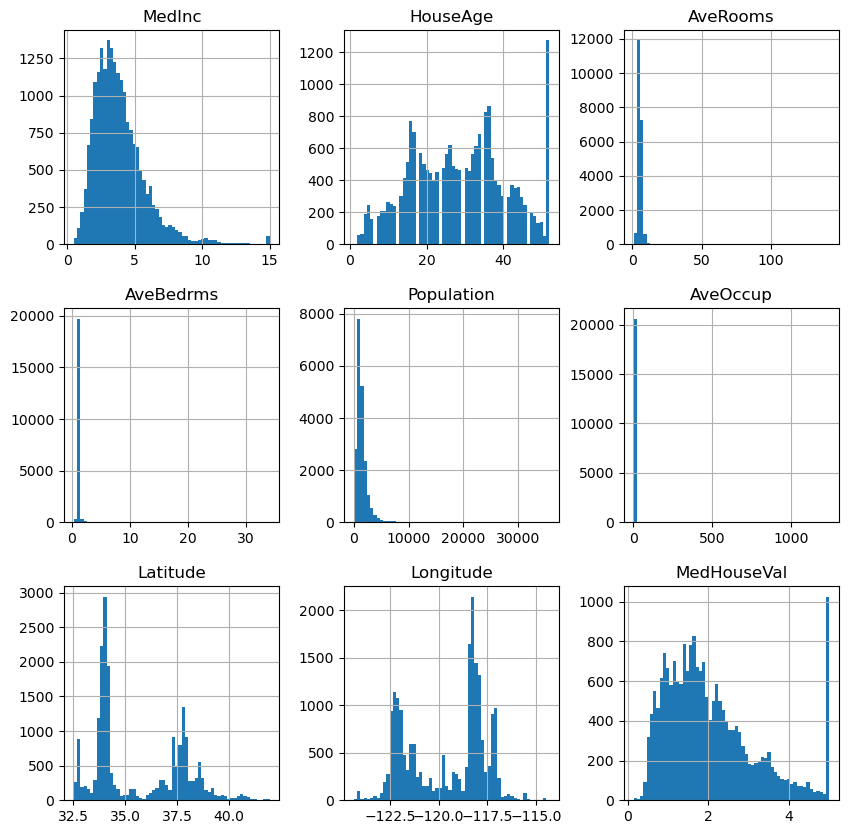

In [5]:
import matplotlib.pyplot as plt 
f = housing_data.hist(bins=60, figsize=(10,10))
plt.show()

In [6]:
housing_data.corr()["MedHouseVal"].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

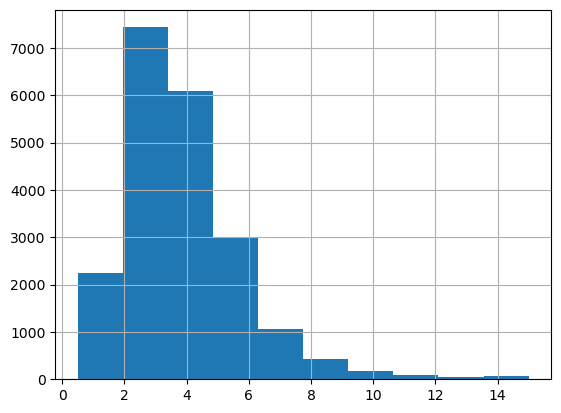

In [7]:
housing_data["MedInc"].hist()
plt.show()

# Splitting it into training and testing set

In [8]:
import numpy as np
l = 5
housing_data["income_cat"] = pd.cut(housing_data["MedInc"],
                                    bins = list(np.arange(0, l))+ [np.inf],
                                    labels=list(np.arange(1,l+1)))

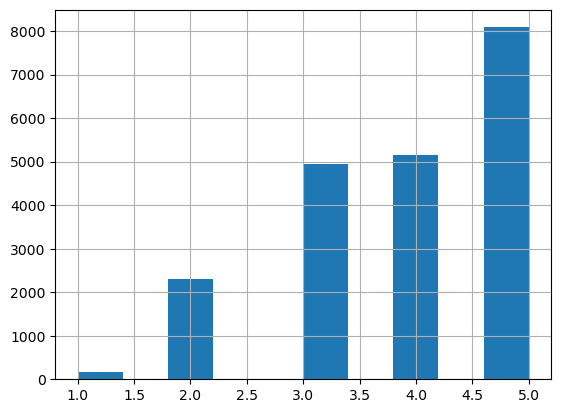

In [9]:
housing_data["income_cat"].hist()
plt.show()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [11]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop("income_cat", inplace=True, axis=1)

# Exploring Data

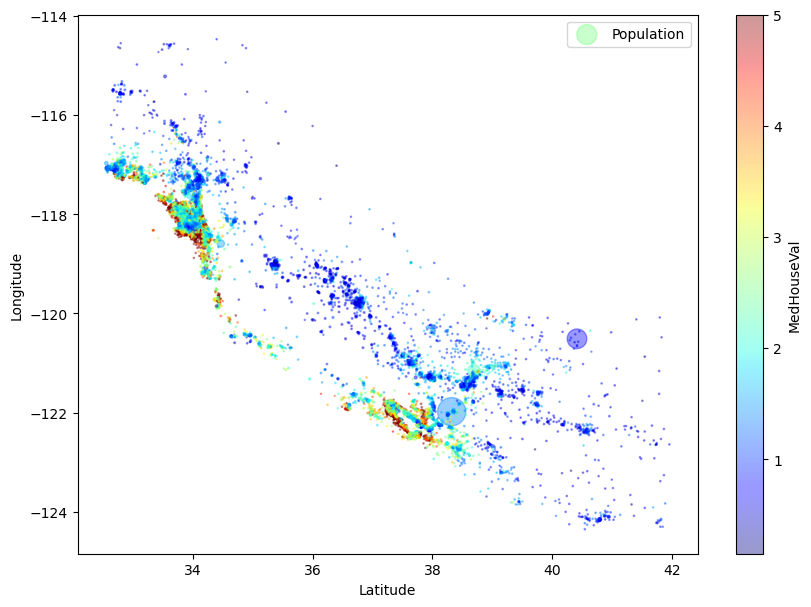

In [12]:
strat_train_set.plot(
    kind="scatter",
    x="Latitude",
    y="Longitude",
    alpha=0.4,
    s=strat_train_set["AveOccup"] / 3,
    c="MedHouseVal",
    label="Population",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    figsize=(10,7)
)
plt.show()

In [13]:
df2 = strat_train_set.copy()

df2["bedrooms_per_room"] =  df2["AveBedrms"] / df2["AveRooms"]

df2.corr()["MedHouseVal"].sort_values(ascending=False)

MedHouseVal          1.000000
MedInc               0.692227
AveRooms             0.148783
HouseAge             0.097684
Population          -0.017744
AveOccup            -0.026218
AveBedrms           -0.041385
Longitude           -0.042804
Latitude            -0.149534
bedrooms_per_room   -0.260143
Name: MedHouseVal, dtype: float64

In [14]:
df2.skew()

MedInc                1.631936
HouseAge              0.058764
AveRooms             22.327771
AveBedrms            32.652708
Population            3.259608
AveOccup             92.977126
Latitude              0.465172
Longitude            -0.291105
MedHouseVal           0.977188
bedrooms_per_room     2.303511
dtype: float64

In [15]:
t = df2.apply(lambda x : np.log(x))

c:\Users\Metron\Desktop\ML\ml_env\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
t.skew()

MedInc              -0.148565
HouseAge            -1.276309
AveRooms             0.973924
AveBedrms            6.378177
Population          -1.058082
AveOccup             2.224120
Latitude             0.407589
Longitude                 NaN
MedHouseVal         -0.169273
bedrooms_per_room    0.540682
dtype: float64

In [17]:
t.corr()["MedHouseVal"]

MedInc               0.681052
HouseAge             0.040878
AveRooms             0.211102
AveBedrms           -0.111077
Population           0.028161
AveOccup            -0.232840
Latitude            -0.195007
Longitude                 NaN
MedHouseVal          1.000000
bedrooms_per_room   -0.315269
Name: MedHouseVal, dtype: float64

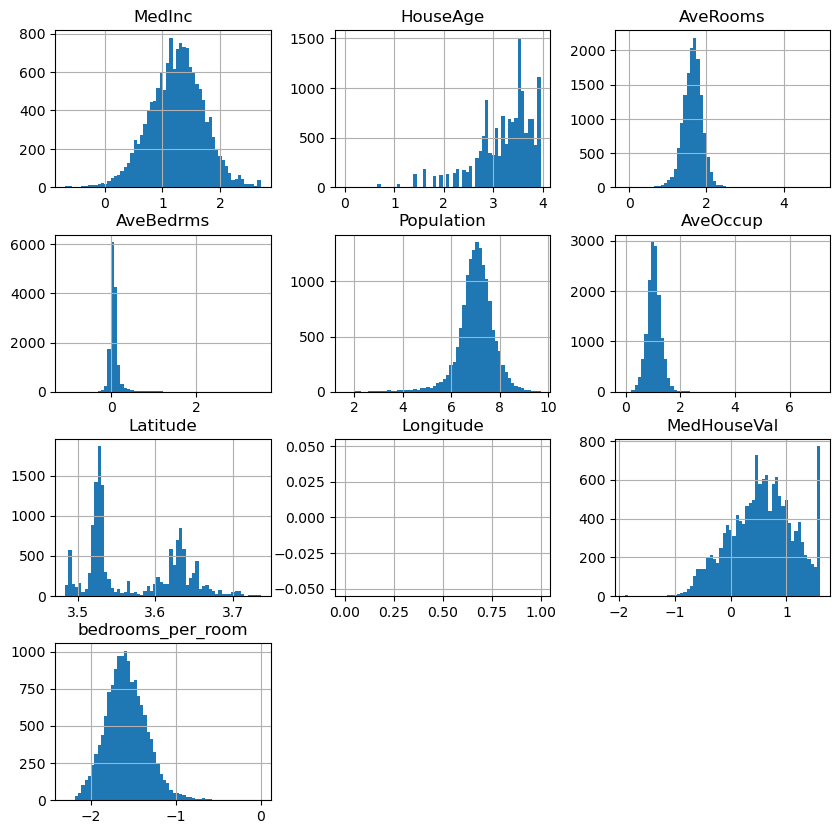

In [18]:
t.hist(bins=60, figsize=(10,10))
plt.show()

# Defining a Pipeline

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

class LogTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, transform_log:bool = True) -> None:
        super().__init__()
        self.transform_log = transform_log
    
    def fit(self, x,y=None):
        return self

    def transform(self, x,y=None):
        m,n = x.shape
        if self.transform_log:
            for num in list(range(n)):
                col = x[:,num]
                if min(col) > 0:
                    x[:,num] = list(np.log(col))
        return x

In [20]:
trial = LogTransformer()
ff = trial.fit_transform(strat_train_set.values)
tt = pd.DataFrame(ff, columns=strat_train_set.columns)


In [21]:
skew_show = pd.DataFrame({
    "Normal":strat_train_set.corr()["MedHouseVal"].sort_values(ascending=False),
    "Fixed": tt.corr()["MedHouseVal"].sort_values(ascending=False)
}, index=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal', 'bedrooms_per_room'])
skew_show

,Normal,Fixed
MedInc,0.692227,0.681052
HouseAge,0.097684,0.040878
AveRooms,0.148783,0.211102
AveBedrms,-0.041385,-0.111077
Population,-0.017744,0.028161
AveOccup,-0.026218,-0.232840
Latitude,-0.149534,-0.195007
Longitude,-0.042804,-0.019766
MedHouseVal,1.000000,1.000000
bedrooms_per_room,NaN,NaN


In [22]:
col_names = "AveRooms", "AveBedrms", 
rooms_ix, bedrooms_ix = [strat_train_set.columns.get_loc(c) for c in col_names] 

In [23]:
class CombinedAttribAdder(BaseEstimator, TransformerMixin):

    def __init__(self, add_bpr:bool = True) -> None:
        super().__init__()
        self.add_bpr = add_bpr

    def fit(self, x,y=None):
        return self
    
    def transform(self, x,y=None):
        if self.add_bpr:
            n = x[:, bedrooms_ix] / x[:,rooms_ix]
            return np.c_[x,n]
        else:
            return x

In [24]:
trial_2 = CombinedAttribAdder()

tt3 = trial_2.fit_transform(strat_train_set.values)

In [25]:
tt4 = trial.fit_transform(tt3)

In [26]:
df = pd.DataFrame(tt4, columns=list(strat_train_set.columns) + ["bedrooms_per_room"])

df.corr()["MedHouseVal"].sort_values(ascending=False)

MedHouseVal          1.000000
MedInc               0.681052
AveRooms             0.211102
HouseAge             0.040878
Population           0.028161
Longitude           -0.019766
AveBedrms           -0.111077
Latitude            -0.195007
AveOccup            -0.232840
bedrooms_per_room   -0.315269
Name: MedHouseVal, dtype: float64

In [27]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal', 'bedrooms_per_room'],
      dtype='object')

In [28]:
skew_show["New"] = df.corr()["MedHouseVal"].sort_values(ascending=False)
skew_show

,Normal,Fixed,New
MedInc,0.692227,0.681052,0.681052
HouseAge,0.097684,0.040878,0.040878
AveRooms,0.148783,0.211102,0.211102
AveBedrms,-0.041385,-0.111077,-0.111077
Population,-0.017744,0.028161,0.028161
AveOccup,-0.026218,-0.232840,-0.232840
Latitude,-0.149534,-0.195007,-0.195007
Longitude,-0.042804,-0.019766,-0.019766
MedHouseVal,1.000000,1.000000,1.000000
bedrooms_per_room,NaN,NaN,-0.315269


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ("attribs_adder", CombinedAttribAdder()),
    ("log_trans", LogTransformer()),
    ("scaler", StandardScaler())
])

In [30]:
y_train = strat_train_set["MedHouseVal"].copy()
x_train = strat_train_set.drop("MedHouseVal", axis=1)

# Training the models

In [31]:
x_train_prepared = full_pipeline.fit_transform(x_train.values)

In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train_prepared, y_train)

LinearRegression()

In [33]:
from sklearn.metrics import mean_squared_error

x_train_preds = lin_reg.predict(x_train_prepared)
lin_reg_mse = mean_squared_error(y_train, x_train_preds)
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_rmse

0.7218655822801148

In [34]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(lin_reg, x_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)

lin_reg_scores = np.sqrt(-scores)

In [35]:
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

In [36]:
display_scores(lin_reg_scores)

Scores: [0.72957423 0.6892889  0.71723513 0.76040866 0.7259062  0.76109293
 0.72257609 0.73970984 0.68846527 0.68760701]
Mean: 0.7221864254018088
Standard Deviation: 0.02605745310610829


In [37]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train_prepared, y_train)

Ridge()

In [38]:
scores = cross_val_score(ridge, x_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)

ridge_scores = np.sqrt(-scores)

In [39]:
display_scores(ridge_scores)

Scores: [0.72731941 0.68916724 0.71748482 0.76069069 0.7265484  0.761157
 0.72264394 0.74064999 0.68819963 0.68702168]
Mean: 0.7220882802484088
Standard Deviation: 0.026252063485945394


In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train_prepared, y_train)

DecisionTreeRegressor()

In [41]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(tree_reg, x_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [42]:
display_scores(tree_rmse_scores)

Scores: [0.73635384 0.73202323 0.72913232 0.7089655  0.73042064 0.80990055
 0.73924182 0.75298712 0.71011281 0.76977307]
Mean: 0.7418910901274491
Standard Deviation: 0.028371073525505282


In [43]:
from sklearn.ensemble import RandomForestRegressor

rand_frst = RandomForestRegressor()
rand_frst.fit(x_train_prepared, y_train)

RandomForestRegressor()

In [45]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(rand_frst, x_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [46]:
display_scores(tree_rmse_scores)

Scores: [0.53022479 0.49477881 0.52589397 0.51888746 0.50485647 0.54591727
 0.51709757 0.51117903 0.47781604 0.49953263]
Mean: 0.512618403277394
Standard Deviation: 0.01848625791260519


In [47]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]


In [48]:
from sklearn.model_selection import GridSearchCV

rand_frst_2 = RandomForestRegressor()

grid_search = GridSearchCV(rand_frst_2, param_grid, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(x_train_prepared, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
final_model = grid_search.best_estimator_

In [50]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(final_model, x_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)

final = np.sqrt(-scores)

In [51]:

display_scores(final)

Scores: [0.52142246 0.50074651 0.52430536 0.52281344 0.51534305 0.54590761
 0.51360709 0.50660496 0.48837905 0.49610755]
Mean: 0.5135237075405048
Standard Deviation: 0.015696082132658


In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(x_train_prepared, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021C79A3AB60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021C72BBFCA0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [55]:
next = rnd_search.best_estimator_

In [56]:
scores = cross_val_score(next, x_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)

final = np.sqrt(-scores)

In [57]:
display_scores(final)

Scores: [0.51452119 0.48535094 0.51202766 0.51590926 0.51223873 0.53168464
 0.50222075 0.49990595 0.47007677 0.48955374]
Mean: 0.5033489626852613
Standard Deviation: 0.016953587888657615


In [58]:
best_params = rnd_search.best_params_

In [59]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('rnd_frst', RandomForestRegressor(**best_params))
])

In [60]:
param_grid = [{
    "preparation__attribs_adder__add_bpr": [True, False],
    "preparation__log_trans__transform_log": [True, False]
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(x_train.values, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END preparation__attribs_adder__add_bpr=True, preparation__log_trans__transform_log=True; total time=  14.4s
[CV] END preparation__attribs_adder__add_bpr=True, preparation__log_trans__transform_log=True; total time=  14.1s
[CV] END preparation__attribs_adder__add_bpr=True, preparation__log_trans__transform_log=True; total time=  14.2s
[CV] END preparation__attribs_adder__add_bpr=True, preparation__log_trans__transform_log=True; total time=  14.5s
[CV] END preparation__attribs_adder__add_bpr=True, preparation__log_trans__transform_log=True; total time=  14.3s
[CV] END preparation__attribs_adder__add_bpr=True, preparation__log_trans__transform_log=False; total time=  14.4s
[CV] END preparation__attribs_adder__add_bpr=True, preparation__log_trans__transform_log=False; total time=  14.2s
[CV] END preparation__attribs_adder__add_bpr=True, preparation__log_trans__transform_log=False; total time=  14.3s
[CV] END preparation__att

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        Pipeline(steps=[('attribs_adder',
                                                         CombinedAttribAdder()),
                                                        ('log_trans',
                                                         LogTransformer()),
                                                        ('scaler',
                                                         StandardScaler())])),
                                       ('rnd_frst',
                                        RandomForestRegressor(max_features=3,
                                                              n_estimators=75))]),
             param_grid=[{'preparation__attribs_adder__add_bpr': [True, False],
                          'preparation__log_trans__transform_log': [True,
                                                                    False]}],
             scoring='neg_mean_squared_error', verbose=2)

In [61]:
grid_search_prep.best_estimator_

Pipeline(steps=[('preparation',
                 Pipeline(steps=[('attribs_adder',
                                  CombinedAttribAdder(add_bpr=False)),
                                 ('log_trans',
                                  LogTransformer(transform_log=False)),
                                 ('scaler', StandardScaler())])),
                ('rnd_frst',
                 RandomForestRegressor(max_features=3, n_estimators=75))])

In [62]:
y_test = strat_test_set["MedHouseVal"].copy()
x_test = strat_test_set.drop("MedHouseVal", axis=1)

In [63]:
y_preds = grid_search_prep.predict(x_test.values)

In [64]:
np.sqrt(mean_squared_error(y_test, y_preds))

0.49309655694531346

In [65]:
from sklearn.metrics import r2_score

r2_score(y_test, y_preds)

0.8159864027620778